# "Liver Disease Prediction: A Machine Learning Approach"

### Introduction:
In this tutorial, we'll develop a machine learning model to predict liver disease based on patient data. We'll cover data preprocessing, exploratory data analysis (EDA), model selection, training, evaluation, and prediction.

### Step 1: Importing Libraries and Loading Data
We start by importing necessary libraries like numpy, pandas, seaborn, and scikit-learn. Then, we load the dataset (`indian_liver_patient.csv`) using pandas.

In [8]:
# importing required library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("indian_liver_patient.csv")

Here's an explanation for each of the terms in column tooks in LFT(liver function test):

1. **Age**: Refers to the chronological age of an individual, typically measured in years.
  
2. **Gender**: Denotes the classification of individuals based on their biological sex, typically categorized as male or female.

3. **Total_Bilirubin**: Total amount of bilirubin present in the blood, measured in micromoles per liter (µmol/L) or milligrams per deciliter (mg/dL).

4. **Direct_Bilirubin**: Also known as conjugated bilirubin, it represents the fraction of bilirubin that is direct or conjugated with glucuronic acid, measured in µmol/L or mg/dL.

5. **Alkaline_Phosphatase**: An enzyme primarily found in the liver, bones, and bile ducts, used as a marker for liver and bone disorders, measured in international units per liter (IU/L).

6. **Alamine_Aminotransferase**: Also known as alanine transaminase (ALT), it is an enzyme found primarily in the liver, used as a marker for liver health, measured in IU/L.

7. **Aspartate_Aminotransferase**: Also known as aspartate transaminase (AST), it is an enzyme found in various tissues, including the liver, heart, and muscles, measured in IU/L.

8. **Total_Protiens**: The total concentration of proteins in the blood, including albumin and globulin, measured in g/dL.

9. **Albumin**: The main protein synthesized by the liver, responsible for maintaining oncotic pressure and transporting various substances in the blood, measured in g/dL.

10. **Albumin_and_Globulin_Ratio**: The ratio of albumin to globulin in the blood, providing insight into liver and kidney function, with a normal range typically between 0.8 to 2.0.

### Step 2: Data Exploration
We explore the dataset by examining its shape, information, and summary statistics to understand its structure and characteristics.

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
df.shape

(583, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Step 3: Data Preprocessing
We handle missing values by dropping rows with null values and remove duplicate entries to ensure data quality.

In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(579, 11)

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(566, 11)

### Step 4: Exploratory Data Analysis (EDA)
We visualize the distribution of target variable `Dataset` and explore relationships between features using seaborn's countplots and catplots.

number of patients with liver disease:  404
number of patients not diagnosed with liver disease:  162


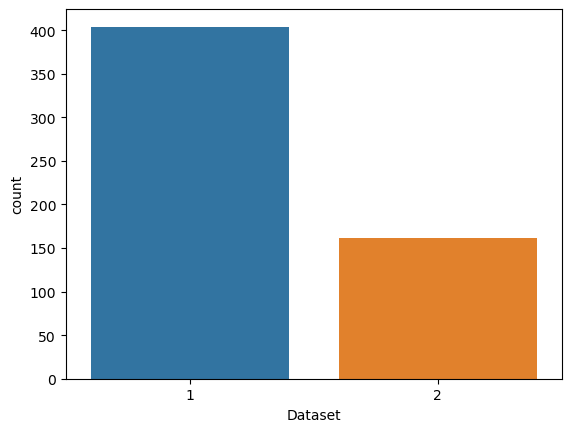

In [20]:
sb.countplot(df['Dataset'],label="count");
ld,nld = df['Dataset'].value_counts()
print("number of patients with liver disease: ", ld)
print("number of patients not diagnosed with liver disease: ",nld)

Number of patients who are male : 428
Number of patients who are female : 138


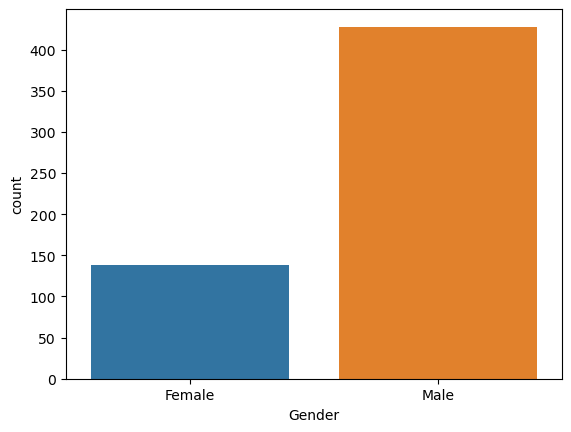

In [21]:
sb.countplot(df['Gender'],label = "count")
m,f = df['Gender'].value_counts()
print("Number of patients who are male :",m)
print("Number of patients who are female :",f)

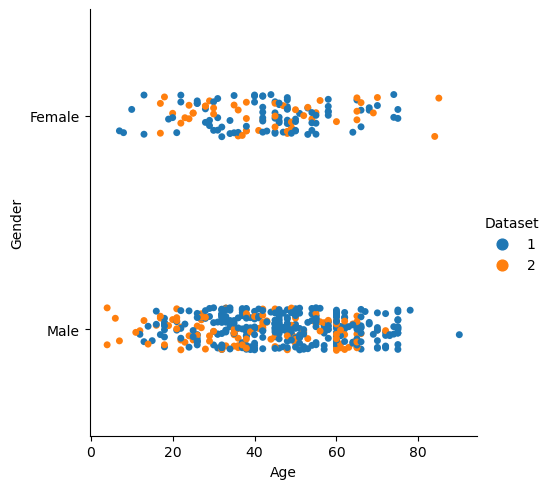

In [22]:
sb.catplot(x="Age",y = "Gender", hue="Dataset" , data = df);

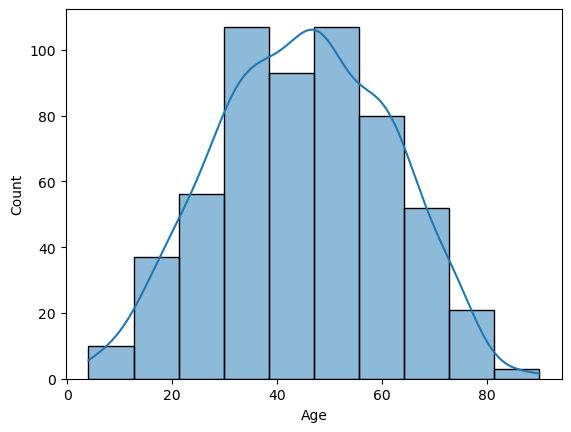

In [28]:
sb.histplot(df['Age'],bins=10,kde=True);

In [23]:
df[['Gender','Dataset','Age']].groupby(['Dataset','Gender'],as_index=False).count().sort_values(by='Dataset',ascending=False)

,Dataset,Gender,Age
2,2,Female,48
3,2,Male,114
0,1,Female,90
1,1,Male,314


In [17]:
# Handling imbalance data
#df['Dataset'].value_counts()

In [18]:
#df_sam1 = df[df['Dataset']==1].sample(200)
#df_sam2 = df[df['Dataset']!=1]

In [19]:
#df1 = pd.concat([df_sam1,df_sam2])

In [20]:
#df1['Dataset'].value_counts()

### Step 5: Feature Engineering
We encode categorical variables (e.g., `Gender`) using one-hot encoding to prepare the data for modeling.

In [21]:
dummy = pd.get_dummies(df.Gender)

In [22]:
df2=pd.concat([df,dummy],axis=1,)

In [23]:
df2.drop(columns="Gender",inplace=True)

In [24]:
df2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


### Step 6: Splitting Data
We split the dataset into training and testing sets using `train_test_split` from scikit-learn to facilitate model training and evaluation.

In [25]:
# splitting dataset into dependent variable and independent variable
# splitting dataset into train data and test data

In [26]:
x= df2.drop("Dataset",axis=1)
y= df2.Dataset

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20,random_state=42)

### Step 7: Feature Correlation
We visualize feature correlations using a heatmap to identify relationships between variables.

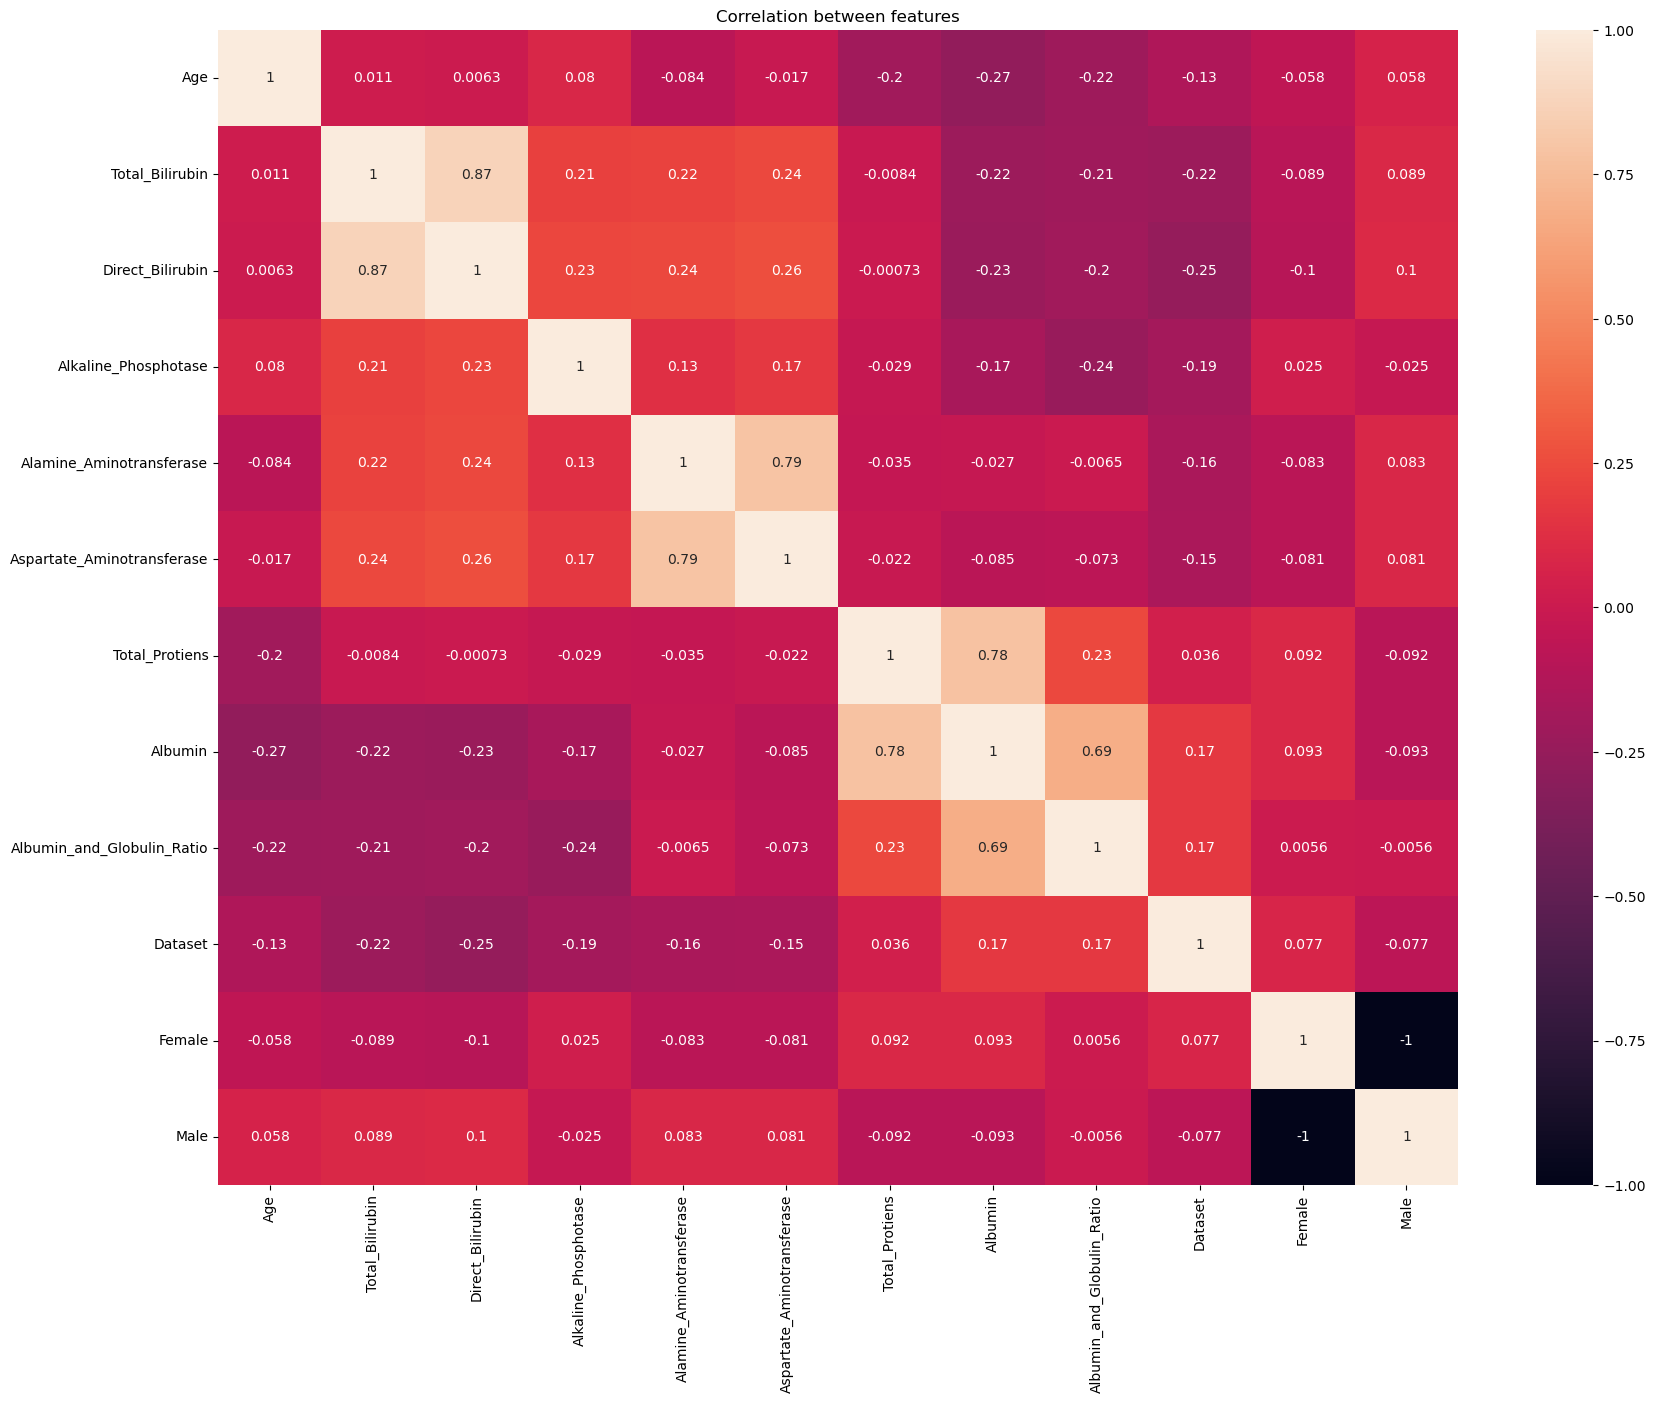

In [40]:
plt.figure(figsize=(20,15))
sb.heatmap(df2.corr(),annot=True)
plt.title("Correlation between features");

# Machine Learning Models

### Step 8: Model Selection
We choose machine learning models including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gaussian Naive Bayes for liver disease prediction.

In [41]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score

In [42]:
# importing required library for machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [43]:
model_Log = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_random = RandomForestClassifier()
model_svm = SVC()
model_gn = GaussianNB()

### Step 9: Cross-Validation
We perform k-fold cross-validation to evaluate model performance with different split sizes and select the best performing model.

In [44]:
model = [model_Log,model_tree,model_random,model_svm,model_gn]
L,T,R,S,G=[],[],[],[],[]
splits =[2,3,4,5,6,7,8,9]
for i in splits:
    cv = KFold(n_splits=10,random_state=10,shuffle=True)
    for j in model:
        score = cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_Log:
            L.append(score.mean())
        elif j==model_tree:
            T.append(score.mean())
        elif j==model_random:
            R.append(score.mean())
        elif j==model_svm:
            S.append(score.mean())
        elif j==model_gn:
            G.append(score.mean())

In [45]:
pd.DataFrame({"n_splits":splits,"Logistic Regression":L,"Decision Tree":T,"Random Forest":R,"SVM":S,"GaussianNB":G})

,n_splits,Logistic Regression,Decision Tree,Random Forest,SVM,GaussianNB
0,2,0.721208,0.641836,0.728116,0.734493,0.559469
1,3,0.721208,0.659469,0.719179,0.734493,0.559469
2,4,0.721208,0.644010,0.721208,0.734493,0.559469
3,5,0.721208,0.643865,0.725797,0.734493,0.559469
4,6,0.721208,0.657343,0.712367,0.734493,0.559469
5,7,0.721208,0.646232,0.727923,0.734493,0.559469
6,8,0.721208,0.659420,0.734686,0.734493,0.559469
7,9,0.721208,0.668357,0.714589,0.734493,0.559469


**Random Forest with 8 split has more accuracy**
- Now im fitting the model with Random forest with 8 split

### Step 10: Model Training and Evaluation
We train the selected Random Forest model on the training data and evaluate its performance using testing data, generating classification reports and confusion matrices.

In [46]:
model_random_forest = RandomForestClassifier(n_estimators=8)
model_random_forest.fit(x_train,y_train)
y_pred = model_random_forest.predict(x_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 1], dtype=int64)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.91      0.78        93
           2       0.53      0.18      0.27        49

    accuracy                           0.66       142
   macro avg       0.60      0.55      0.53       142
weighted avg       0.63      0.66      0.60       142



In [37]:
confusion_matrix(y_test,y_pred)

array([[85,  8],
       [40,  9]], dtype=int64)

In [38]:
model_random_forest.score(x_test,y_test)

0.6619718309859155

**Prediction on test data**

In [48]:
pd.DataFrame({"test data": y_test,"Predicted ":y_pred}).sample(14)

,test data,Predicted
95,1,1
157,1,1
287,2,2
236,2,1
254,2,1
463,1,1
266,1,2
338,1,1
88,1,1
474,2,1


In [49]:
df2.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female', 'Male'],
      dtype='object')

In [50]:
df2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [51]:
x.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


### Step 11: Prediction
Finally, we use the trained model to make predictions on new data, providing insights into potential liver disease diagnosis.

In [52]:
model_random_forest.predict([[56,0.90,0.41,409,35.75,57.28,7.23,2.96,4.27,0,1]])

array([1], dtype=int64)

**Here 1 refers to the person who has liver disease**

In [54]:
model_random_forest.predict([[40,0.82,0.3,89,32,36,7,4,4,0,1]])

array([2], dtype=int64)

**Here 2 refers to the person doesn't have any liver disease**

### Conclusion:
This demonstrates a step-by-step approach to building a machine learning model for liver disease prediction, from data preprocessing to model evaluation and prediction. Feel free to modify and expand upon this project for further exploration!